# Fake News Classification using Multinomial and Gaussian Naive Bayes Classifiers



![alt text](arloo170800353.jpg "Title")


[link] (https://images.assetsdelivery.com/compings_v2/arloo/arloo1708/arloo170800353.jpg)

**This project is based on Classification of Fake News using Multionomial and Gaussian Naive Bayes Classifiers.** 
The dataset used consists of 2 files - one for Training and the other for Testing.  
In the cell below, we have imported all the necessary libraries/modules required in our code. 

The libraries are - 

1) pandas - Used for data manipulation and data analysis 

2) seaborn - used for data visualization 

3) sklearn - it is a software machine learning library that contains all the Machine Learning Algorithms and various parameter metrics 



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn import metrics
from sklearn.utils import shuffle
from sklearn.metrics import classification_report


#### Reading data from local directory 
The train and test files in the dataset where in .tsv (Tab Separated Values) format. So, I first read the files and then converted them to .csv (Comma Separated Values) format. After converting them to .csv, I read it into the code. 

In [2]:
train_tsv = pd.read_table(r"C:\Users\HP\Desktop\Windsor Winter Term\Information Retrieval Systems\Fake News Detection dataset\train_file.tsv", sep = '\t')

In [3]:
train_tsv.to_csv('train_file.csv', index=True)

In [4]:
train_data = pd.read_csv('train_file.csv')

#### Description of dataset -
The dataset has 2 files namely - *train_file and test_file.* Both the files have columns with index, truthiness of news (classified into six categories - true, false, half-true, mostly-true, barely-true, pants-fire). For my project, I kept the data classified as **true and false** only! Thus, making it a **Binary Classification Project**

In [5]:
train_data.head()

,Unnamed: 0,0,2635.json,false,Says the Annies List political group supports third-trimester abortions on demand.,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0.1,0.0.2,0.0.3,a mailer,"That's a premise that he fails to back up. Annie's List makes no bones about being comfortable with candidates who oppose further restrictions on late-term abortions. Then again, this year its backing two House candidates who voted for more limits."
0,0,1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,"Surovell said the decline of coal ""started whe..."
1,1,2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,Obama said he would have voted against the ame...
2,2,3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,The release may have a point that Mikulskis co...
3,3,4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,"Crist said that the economic ""turnaround start..."
4,4,5,12465.json,true,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece,"But Vos specifically used the word ""fired,"" wh..."


In the code below, I have created a dictionary assigning column names as keys and values as the first row in the data 

In [6]:
train_dict = {'News_ID' : train_data['0'],
              'statement_to_train' : train_data['Says the Annies List political group supports third-trimester abortions on demand.'],
             'Explanation' :train_data["That's a premise that he fails to back up. Annie's List makes no bones about being comfortable with candidates who oppose further restrictions on late-term abortions. Then again, this year its backing two House candidates who voted for more limits."],
             'train_label' : train_data['false']}

#### Transformation to a data frame 
The dictionary is converted to a data frame and the total number of values for all the columns are displayed using __.count__ function in pandas.

In [7]:
train_df = pd.DataFrame(train_dict)

In [8]:
train_df.count()

News_ID               10239
statement_to_train    10239
Explanation           10155
train_label           10239
dtype: int64

In [9]:
#print(train_df.train_label)

##### Keeping the values classified as True and False only. 

In [10]:
true_label = train_df.loc[train_df['train_label'] == 'true']
false_label = train_df.loc[train_df['train_label'] == 'false']

In [11]:
print(true_label.count())

News_ID               1676
statement_to_train    1676
Explanation           1664
train_label           1676
dtype: int64


In [12]:
print(false_label.count())

News_ID               1994
statement_to_train    1994
Explanation           1975
train_label           1994
dtype: int64


In [13]:
#false_label.head()

In [14]:
#true_label.tail()

##### Joining the true and false classified rows together horizontally using **.concat** function in python. 

In [15]:
full_train_data = pd.concat([true_label, false_label], axis=0)

In [16]:
full_train_data.columns

Index(['News_ID', 'statement_to_train', 'Explanation', 'train_label'], dtype='object')

##### Shuffling the data is required to ensure that each data point contributes independently to the learning process, without being influenced by their successors. 

In [17]:
full_train_data = shuffle(full_train_data)

### All the operations performed above are also performed on the Testing file below !

In [18]:
test_tsv = pd.read_table(r"C:\Users\HP\Desktop\Windsor Winter Term\Information Retrieval Systems\Fake News Detection dataset\test_file.tsv", sep = '\t')

In [19]:
test_tsv.to_csv('test_file.csv', index=True)

In [20]:
test_data = pd.read_csv('test_file.csv')

In [21]:
test_data.tail()

,Unnamed: 0,0,11972.json,true,Building a wall on the U.S.-Mexico border will take literally years.,immigration,rick-perry,Governor,Texas,republican,30,30.1,42,23,18,Radio interview,"Meantime, engineering experts agree the wall would most likely take years to complete. Keep in mind, too, it took more than six years to build roughly 700 miles of fence and barriers along the roughly 2,000-mile U. S. -Mexico border."
1261,1261,1262,7334.json,half-true,Says his budget provides the highest state fun...,education,rick-scott,Governor,Florida,republican,28,23,38,34,7,a news conference,LeMieux didn't compare Rubio and Obama on an i...
1262,1262,1263,9788.json,barely-true,Ive been here almost every day.,"civil-rights,crime,criminal-justice",jay-nixon,Governor,Missouri,democrat,2,0,0,1,0,"on ABC's ""This Week""","After making his pledge, Obama said the budget..."
1263,1263,1264,10710.json,barely-true,"In the early 1980s, Sen. Edward Kennedy secret...","bipartisanship,congress,foreign-policy,history",mackubin-thomas-owens,"senior fellow, Foreign Policy Research Institute",Rhode Island,columnist,1,0,0,0,0,a commentary in The Providence Journal,Former President Clinton said government got t...
1264,1264,1265,3186.json,barely-true,Says an EPA permit languished under Strickland...,"environment,government-efficiency",john-kasich,"Governor of Ohio as of Jan. 10, 2011",Ohio,republican,9,8,10,18,3,a news conference,Points of Light has a unique mission carved ou...
1265,1265,1266,6743.json,false,Says the governor is going around the state ta...,"state-budget,state-finances,taxes",john-burzichelli,NaN,NaN,democrat,1,1,0,0,0,an interview with NJToday,"In reality, the Affordable Care Act calls for ..."


In [22]:
test_dict = {'News_ID' : test_data['0'],
              'statement_to_test' : test_data['Building a wall on the U.S.-Mexico border will take literally years.'],
             'Explanation' :test_data["Meantime, engineering experts agree the wall would most likely take years to complete. Keep in mind, too, it took more than six years to build roughly 700 miles of fence and barriers along the roughly 2,000-mile U. S. -Mexico border."],
             'test_label' : test_data['true']}

In [23]:
test_df = pd.DataFrame(test_dict)

In [24]:
test_df.head()

,News_ID,statement_to_test,Explanation,test_label
0,1,Wisconsin is on pace to double the number of l...,She cited layoff notices received by the state...,false
1,2,Says John McCain has done nothing to help the ...,"Trump said that McCain ""has done nothing to he...",false
2,3,Suzanne Bonamici supports a plan that will cut...,"But spending still goes up. In addition, many ...",half-true
3,4,When asked by a reporter whether hes at the ce...,Our rating A Democratic Party web video making...,pants-fire
4,5,Over the past five years the federal governmen...,Rhode Islands former top cop is setting his ba...,true


In [25]:
test_true_label = test_df.loc[test_df['test_label'] == 'true']
test_false_label = test_df.loc[test_df['test_label'] == 'false']

In [26]:
false_count = test_false_label.count()
print(false_count)

News_ID              249
statement_to_test    249
Explanation          249
test_label           249
dtype: int64


In [27]:
true_count = test_true_label.count()
print(true_count)

News_ID              207
statement_to_test    207
Explanation          205
test_label           207
dtype: int64


In [28]:
full_test_data = pd.concat([test_true_label, test_false_label], axis=0)


In [29]:
full_test_data = shuffle(full_test_data)

### CountVectorizer

![CV](CV.svg "image")



[link] (https://www.educative.io/api/edpresso/shot/5197621598617600/image/6596233398321152)

In [30]:
vectorizer = CountVectorizer(stop_words = 'english')

In [31]:
train_vector = vectorizer.fit_transform(full_train_data['statement_to_train'])

In [32]:
test_vector = vectorizer.transform(full_test_data['statement_to_test'])

In [33]:
print(vectorizer.get_feature_names()[200:210])

['3666', '37', '370', '376', '378', '38', '385', '38th', '39', '395']


### Tfidf Vectorizer

![CV](tfidf.png "image")

[link] (https://miro.medium.com/max/3604/1*qQgnyPLDIkUmeZKN2_ZWbQ.png)

In [84]:
tfidf_vectorizer = TfidfVectorizer(stop_words = 'english', max_df = 0.7)
#max_df - When building the vocabulary ignore terms that have a document
#frequency strictly higher than the given threshold (corpus-specific stop words)
#because higher the tf-idf score, rarer the term

In [35]:
train_tfidf = tfidf_vectorizer.fit_transform(full_train_data['statement_to_train'])

In [36]:
test_tfidf = tfidf_vectorizer.transform(full_test_data['statement_to_test'])

In [37]:
print(vectorizer.get_feature_names()[:10])

['000', '02', '033', '05', '054th', '07', '09', '095', '10', '100']


In [38]:
train_tfidf.shape

(3670, 7186)

In [39]:
print(train_tfidf.A[:20])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [40]:
print(test_tfidf.A[:20])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [41]:
test_tfidf.shape

(456, 7186)

#### Getting the count of features names in Count Vectorizer and TFIDF Vectorizer and then finding the difference between them

In [42]:
count_df = pd.DataFrame(train_vector.A, columns=vectorizer.get_feature_names())
tfidf_df = pd.DataFrame(train_tfidf.A, columns=tfidf_vectorizer.get_feature_names())
print(count_df.head())
print(tfidf_df.head())


   000  02  033  05  054th  07  09  095  10  100  ...  youve  yuri  zeldin  \
0    0   0    0   0      0   0   0    0   0    0  ...      0     0       0   
1    0   0    0   0      0   0   0    0   0    0  ...      0     0       0   
2    0   0    0   0      0   0   0    0   0    0  ...      0     0       0   
3    0   0    0   0      0   0   0    0   0    0  ...      0     0       0   
4    0   0    0   0      0   0   0    0   0    0  ...      0     0       0   

   zephyr  zero  zika  zip  zombie  zombies  zones  
0       0     0     0    0       0        0      0  
1       0     0     0    0       0        0      0  
2       0     0     0    0       0        0      0  
3       0     0     0    0       0        0      0  
4       0     0     0    0       0        0      0  

[5 rows x 7186 columns]
   000   02  033   05  054th   07   09  095   10  100  ...  youve  yuri  \
0  0.0  0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   0.0   
1  0.0  0.0  0.0  0.0    0.0  0.0  0.0

In [43]:
difference = set(count_df.columns) - set(tfidf_df.columns)
print(difference)


set()


In [44]:
eq = count_df is tfidf_df
print(eq)

False


## Training our Machine Learning Models 


### I have implemented Naive Bayes Classification models namely Multinomial NB and Gaussian NB. 

- I have applied Multinomail NB to CountVectorizer and TfidfVectorizer separately and then comapred the results. 
- The same is done using Gaussian NB 

# Multinomial NB

#### Multinomial naive Bayes assumes to have feature vector where each element represents the number of times it appears (or, very often, its frequency).


__*Multinomial NB applied to CountVectorizer*__ 

In [45]:
mul_NB = MultinomialNB()

mul_NB.fit(train_vector, full_train_data['train_label'])

MultinomialNB()

In [46]:
predictions = mul_NB.predict(test_vector)

In [47]:
acc_score = metrics.accuracy_score(full_test_data['test_label'], predictions)
acc_score = round(acc_score*100, 2)

In [48]:
Mul_cm = metrics.confusion_matrix(full_test_data['test_label'], predictions, labels=['true', 'false'])
print('Confusion Matrix is:')
print(Mul_cm)

Confusion Matrix is:
[[117  90]
 [ 87 162]]


In [49]:
print("Accuracy of Fake News Classification using Multinomial Naive Bayes with count_vectorizer is:", acc_score, "%")

Accuracy of Fake News Classification using Multinomial Naive Bayes with count_vectorizer is: 61.18 %


              precision    recall  f1-score   support

       false       0.64      0.65      0.65       249
        true       0.57      0.57      0.57       207

    accuracy                           0.61       456
   macro avg       0.61      0.61      0.61       456
weighted avg       0.61      0.61      0.61       456



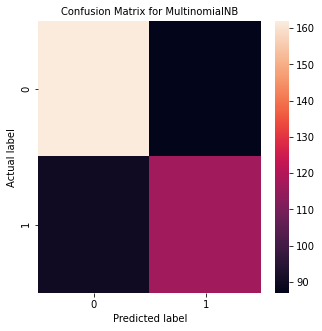

In [50]:
Mul_cm = metrics.confusion_matrix(full_test_data['test_label'], predictions)
plt.show()
plt.figure(figsize=(5,5))
sns.heatmap(Mul_cm);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion Matrix for MultinomialNB', size = 10);

report = classification_report(full_test_data['test_label'], predictions)
print(report)
              

__*Multinomial NB applied to tfidfVectorizer*__ 

In [51]:
mul_NB_2 = MultinomialNB()

mul_NB_2.fit(train_tfidf, full_train_data['train_label'])

MultinomialNB()

In [52]:
predictions2 = mul_NB.predict(test_tfidf)

In [53]:
acc_score2 = metrics.accuracy_score(full_test_data['test_label'], predictions2)
acc_score2 = round(acc_score2 * 100, 2)

In [54]:
Mul_cm_2 = metrics.confusion_matrix(full_test_data['test_label'], predictions2, labels=['true', 'false'])
print('Confusion Matrix using Tfidf is:')
print(Mul_cm_2)

Confusion Matrix using Tfidf is:
[[101 106]
 [ 81 168]]


In [55]:
print("Accuracy of Fake News Classification using Multinomial Naive Bayes with tfidf is:", acc_score2, "%")

Accuracy of Fake News Classification using Multinomial Naive Bayes with tfidf is: 58.99 %


# Gaussian NB

#### The Gaussian Naive Bayes is based on a continuous distribution and it’s suitable for more generic classification tasks.



![GNB](GNB.png "image")

[link] (https://chrisalbon.com/images/machine_learning_flashcards/Gaussian_Naive_Bayes_Classifier_print.png)


__*Gaussian NB applied to CountVectorizer*__ 

In [57]:
mul = GaussianNB()

In [58]:
mul.fit(train_vector.toarray(), full_train_data['train_label'])

GaussianNB()

In [59]:
pred = mul.predict(test_vector.toarray())

In [60]:
acc = metrics.accuracy_score(full_test_data['test_label'], pred)
acc = round(acc* 100, 2)

In [61]:
GNB_cm = metrics.confusion_matrix(full_test_data['test_label'], pred, labels=['true', 'false'])
print('Confusion Matrix using Gaussian NB is:')
print(GNB_cm)

Confusion Matrix using Gaussian NB is:
[[150  57]
 [153  96]]


In [62]:
print("Accuracy of Fake News Classification using Gaussain Naive Bayes is:", acc, "%")

Accuracy of Fake News Classification using Gaussain Naive Bayes is: 53.95 %


__*Gaussian NB applied to tfidfVectorizer*__ 

In [63]:
mul_1 = GaussianNB()

In [65]:
mul_1.fit(train_tfidf.toarray(), full_train_data['train_label'])

GaussianNB()

In [66]:
pred_GNB = mul_1.predict(test_tfidf.toarray())

In [67]:
accGNB = metrics.accuracy_score(full_test_data['test_label'], pred_GNB)
accGNB = round(accGNB* 100, 2)

In [68]:
GBcm = metrics.confusion_matrix(full_test_data['test_label'], pred_GNB, labels=['true', 'false'])
print('Confusion Matrix using Gaussian NB is:')
print(GBcm)

Confusion Matrix using Gaussian NB is:
[[148  59]
 [148 101]]


In [69]:
print("Accuracy of Fake News Classification using Gaussain Naive Bayes is:", accGNB, "%")

Accuracy of Fake News Classification using Gaussain Naive Bayes is: 54.61 %


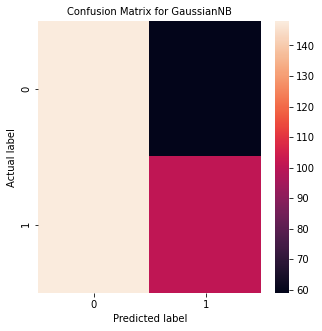

In [82]:
GB_show = metrics.confusion_matrix(full_test_data['test_label'], pred_GNB)
plt.show()
plt.figure(figsize=(5,5))
sns.heatmap(GBcm);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion Matrix for GaussianNB', size = 10);


              


In [83]:
reportGB = classification_report(full_test_data['test_label'], pred_GNB)
print(reportGB)

              precision    recall  f1-score   support

       false       0.63      0.41      0.49       249
        true       0.50      0.71      0.59       207

    accuracy                           0.55       456
   macro avg       0.57      0.56      0.54       456
weighted avg       0.57      0.55      0.54       456



## Support Vector Machine 

In [87]:
from sklearn.svm import LinearSVC
svc_tfidf_clf = LinearSVC()

svc_tfidf_clf.fit(train_vector, full_train_data['train_label'])


svc_pred = svc_tfidf_clf.predict(test_vector)


svc_score = metrics.accuracy_score(full_test_data['test_label'], svc_pred)


svc_cm = metrics.confusion_matrix(full_test_data['test_label'], svc_pred, labels=['true', 'false'])
print('Confusion Matrix --- LinearSVC')
print(svc_cm)
print("accuracy:   %0.3f" % svc_score)

Confusion Matrix --- LinearSVC
[[102 105]
 [100 149]]
accuracy:   0.550


# Logistic Regression

In [90]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(train_vector, full_train_data['train_label'])
y_pred = logreg.predict(test_vector)

log_score = metrics.accuracy_score(full_test_data['test_label'], y_pred)


log_cm = metrics.confusion_matrix(full_test_data['test_label'], y_pred, labels=['true', 'false'])
print('Confusion Matrix --- Logistic Regression')
print(log_cm)
print("accuracy:   %0.3f" % log_score)



Confusion Matrix --- Logistic Regression
[[105 102]
 [ 89 160]]
accuracy:   0.581


## Conclusion 

- The MultinomialNB applied to CountVectorizer outperforms the the other models. It achieved an accuracy of __61.18%__!
- Using GaussianNb on tfidfVectorizer performed better than countVectorizer and attained an accuracy of __55%__ (approx)
- Using Linear Classification Models - SVM and Logistic Regression, we observe that Logistic Regression gave an accuracy of __58%__

### Future Work 

* Apply Text Preprocessing to the above dataset and see how accuracy changes. 
* Later, try to convert it into a detection model using LSTM